In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)


## Monty Hall Problem

In [14]:
goats = make_array('first goat', 'second goat')

In [15]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'


In [16]:
other_goat('first goat'), other_goat('second goat'), other_goat('truck')

('second goat', 'first goat', None)

In [5]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'], dtype='<U11')

In [6]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [7]:
monty_hall_game()

['second goat', 'first goat', 'car']

In [8]:
games = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    games.append(monty_hall_game())

In [9]:
games.show(3)

Guess,Revealed,Remaining
second goat,first goat,car
second goat,first goat,car
first goat,second goat,car


In [10]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3308
first goat,3388
second goat,3304


In [11]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6692
first goat,1666
second goat,1642


In [12]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3308,6692
first goat,3388,1666
second goat,3304,1642


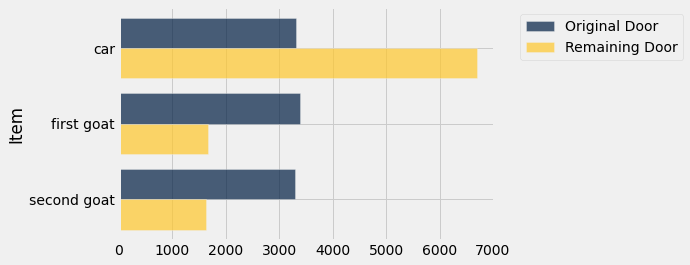

In [13]:
combined.barh(0)